In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
test_metrics = ["precision", "correlation", "dice", "auprc"]

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils

combined_df = pd.read_csv("/home/k2/K2/src/outputs/k2-test/all_test_results_points.csv")


In [18]:
def setup_figure(width=6, height=3):
    sns.set(style='white')
    sns.set_context('paper')
    plt.figure(figsize=(width,height))
    
pal = sns.color_palette('tab20')

In [19]:
combined_df.head()

,Unnamed: 0,encoder,model,threshold,datum_id,regime,metric,value,method
0,0,tile2vec,k20_r8_alpha10000000000.000_tau0.00_lamnan.model,0.4,G-test_069,all,msd,10.790123,K2
1,1,tile2vec,k20_r8_alpha10000000000.000_tau0.00_lamnan.model,0.4,G-test_069,class-1,specificity,0.145015,K2
2,2,tile2vec,k20_r8_alpha10000000000.000_tau0.00_lamnan.model,0.4,G-test_069,all,specificity,0.145015,K2
3,3,tile2vec,k20_r8_alpha10000000000.000_tau0.00_lamnan.model,0.4,G-test_069,class-1,precision,0.028604,K2
4,4,tile2vec,k20_r8_alpha10000000000.000_tau0.00_lamnan.model,0.4,G-test_069,all,precision,0.028604,K2


In [20]:
combined_df[combined_df.metric == "auprc"].reset_index()

,index,Unnamed: 0,encoder,model,threshold,datum_id,regime,metric,value,method
0,26,26,tile2vec,k20_r8_alpha10000000000.000_tau0.00_lamnan.model,0.4,G-test_069,all,auprc,0.054664,K2
1,42,42,tile2vec,k20_r8_alpha10000000000.000_tau0.00_lamnan.model,0.4,G-test_041,all,auprc,NaN,K2
2,70,70,tile2vec,k20_r8_alpha10000000000.000_tau0.00_lamnan.model,0.4,G-test_008,all,auprc,0.007634,K2
3,86,86,tile2vec,k20_r8_alpha10000000000.000_tau0.00_lamnan.model,0.4,G-test_109,all,auprc,NaN,K2
4,102,102,tile2vec,k20_r8_alpha10000000000.000_tau0.00_lamnan.model,0.4,G-test_059,all,auprc,NaN,K2
...,...,...,...,...,...,...,...,...,...,...
979,19806,2418,PLIP,probs_plip,"('>', 0.813513993490033)",G-test_113,all,auprc,0.542367,Probs
980,19822,2434,PLIP,probs_plip,"('>', 0.8389154101742639)",G-test_063,all,auprc,NaN,Probs
981,19838,2450,PLIP,probs_plip,"('>', 0.8201786795623688)",G-test_005,all,auprc,NaN,Probs
982,19854,2466,PLIP,probs_plip,"('>', 0.7910620937021333)",G-test_023,all,auprc,NaN,Probs


<Figure size 640x480 with 0 Axes>

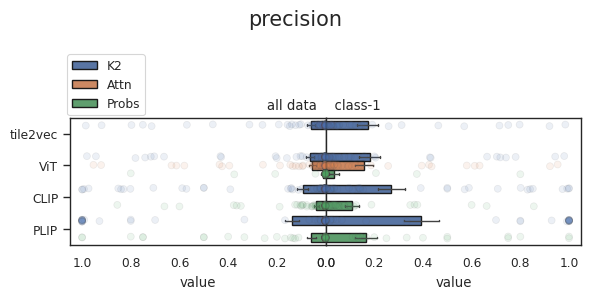

<Figure size 640x480 with 0 Axes>

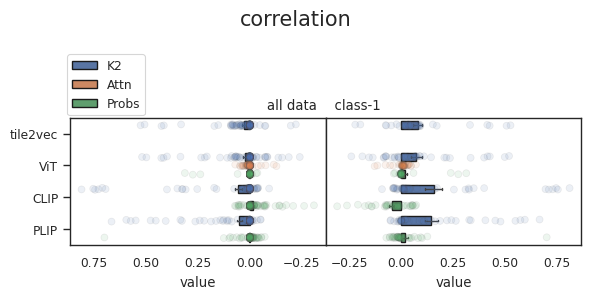

<Figure size 640x480 with 0 Axes>

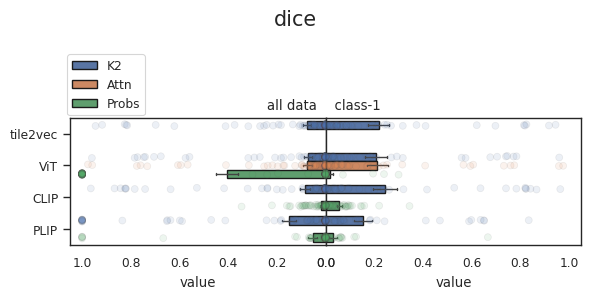

<Figure size 640x480 with 0 Axes>

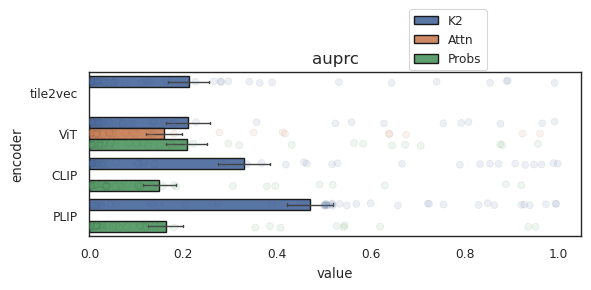

In [34]:
for met in test_metrics:
    subdf = combined_df[combined_df.metric == met].reset_index()
    plt.clf()
    if met == 'auprc':
        setup_figure(6,3)
        ax = sns.barplot(data=subdf[subdf.regime == 'all'], x='value', y='encoder', hue='method', orient='horizontal', errorbar='se', capsize=0.05, errwidth=1.0, linewidth=1, edgecolor="k")
        sns.stripplot(data=subdf[subdf.regime == 'all'], x='value', y='encoder',  hue='method', orient='horizontal', dodge=True, alpha=0.1, linewidth=0.5, ax=ax, legend=False)
        plt.title(met, fontsize=12)
        plt.legend(loc=(0.65,1.01))
    else:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3), sharey=True, gridspec_kw={'wspace': 0})
        sns.barplot(data=subdf[subdf['regime'] == 'class-1'], x='value', y='encoder', hue='method', orient='horizontal', dodge=True, ax=ax2, errorbar='se', capsize=0.05, errwidth=1.0, linewidth=1, edgecolor="k")
        sns.stripplot(data=subdf[subdf['regime'] == 'class-1'], x='value', y='encoder', hue='method', orient='horizontal', dodge=True, alpha=0.1, linewidth=0.5, ax=ax2, legend=False)
        # ax1.yaxis.set_label_position('left')

        ax2.set_title('  '+'class-1', loc='left')
        ax2.set_ylabel('')
        ax2.set_yticklabels([])
        ax2.legend_.remove()
    
        sns.barplot(data=subdf[subdf['regime'] == 'all'], x='value', y='encoder', hue='method', orient='horizontal', dodge=True, ax=ax1, errorbar='se', capsize=0.05, errwidth=1.0, linewidth=1, edgecolor="k")
        sns.stripplot(data=subdf[subdf['regime'] == 'all'], x='value', y='encoder', hue='method', orient='horizontal', dodge=True, alpha=0.1, linewidth=0.5, ax=ax1, legend=False)
        ax1.legend_.remove()
    
        # optionally use the same scale left and right
        xmax = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
        ax1.set_xlim(xmax=xmax)
        ax2.set_xlim(xmax=xmax)

        ax1.invert_xaxis()  # reverse the direction
        ax1.tick_params(axis='y', labelleft=True, left=True, labelright=False, right=False)
        ax1.set_ylabel('')
        ax1.set_title('all data'+'  ', loc='right')

        plt.legend(loc=(-1.01,1.02))

    fig.suptitle(met, fontsize=15)
    
    plt.tight_layout()
    plt.savefig("/home/k2/K2/src/outputs/k2-test/k2-vs-baseline_" + met + ".png", dpi=2000, format='png')
    plt.show()

1